#**Bias-Variance Trade-off**
Tên: Lê Minh Nhựt

MSSV: 22521060

Import 1 số thư viện cần thiết


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(22521060)

Các hàm phát sinh dữ liệu


In [ ]:
def f(x):
  return np.sin(1 + x**2)
def generate_data(N):
  X_train = np.random.uniform(0, 1, N) # dữ liệu được phát sinh ngẫu nhiên trong khoảng (0,1)
  epsilon_train = np.random.normal(0, 0.03, N) # ε tuân theo phân phối chuẩn N(0,σ=0.03)
  Y_train = f(X_train) + epsilon_train # giá trị target y = f(x)=sin(1 + x^2) + ε

  X_test = np.random.uniform(0, 1, N)
  epsilon_test = np.random.normal(0, 0.03, N)
  Y_test = f(X_test) + epsilon_test

  return (X_train, Y_train), (X_test, Y_test)
# đường sin(1 + x^2)
X_curve = np.linspace(0, 1, 100)
Y_curve = np.sin(1 + X_curve**2)

EXPERIMENT 1: N = 10

In [ ]:
N = 10
D1_train, D1_test = generate_data(N)
D2_train, D2_test = generate_data(N)
D3_train, D3_test = generate_data(N)
train_datasets = [D1_train, D2_train, D3_train]
test_datasets = [D1_test, D2_test, D3_test]

Hiển thị các tập dữ liệu

In [ ]:
def show_data(train_datasets, test_datasets):
  fig, axs = plt.subplots(1, 3, figsize=(16, 5))
  for i in range(3):
    if (i == 0):
      #show dữ liệu D1
      axs[i].scatter(train_datasets[0][0], train_datasets[0][1], label = 'Data train')
      axs[i].scatter(test_datasets[0][0], test_datasets[0][1], label = 'Data test')
      axs[i].set_title('D1 Dataset')
    elif (i == 1):
      #show dữ liệu D2
      axs[i].scatter(train_datasets[1][0], train_datasets[1][1], label = 'Data train')
      axs[i].scatter(test_datasets[1][0], test_datasets[1][1], label = 'Data test')
      axs[i].set_title('D2 Dataset')
    else:
      #show dữ liệu D3
      axs[i].scatter(train_datasets[2][0], train_datasets[2][1], label = 'Data train')
      axs[i].scatter(test_datasets[2][0], test_datasets[2][1], label = 'Data test')
      axs[i].set_title('D3 Dataset')
    axs[i].plot(X_curve, Y_curve, color = 'black', label = 'sin(1+X^2)') #plot đường sin(1 + x^2)
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].legend()
    axs[i].set_ylim(0.7, 1.1)
  plt.tight_layout()
  plt.show()

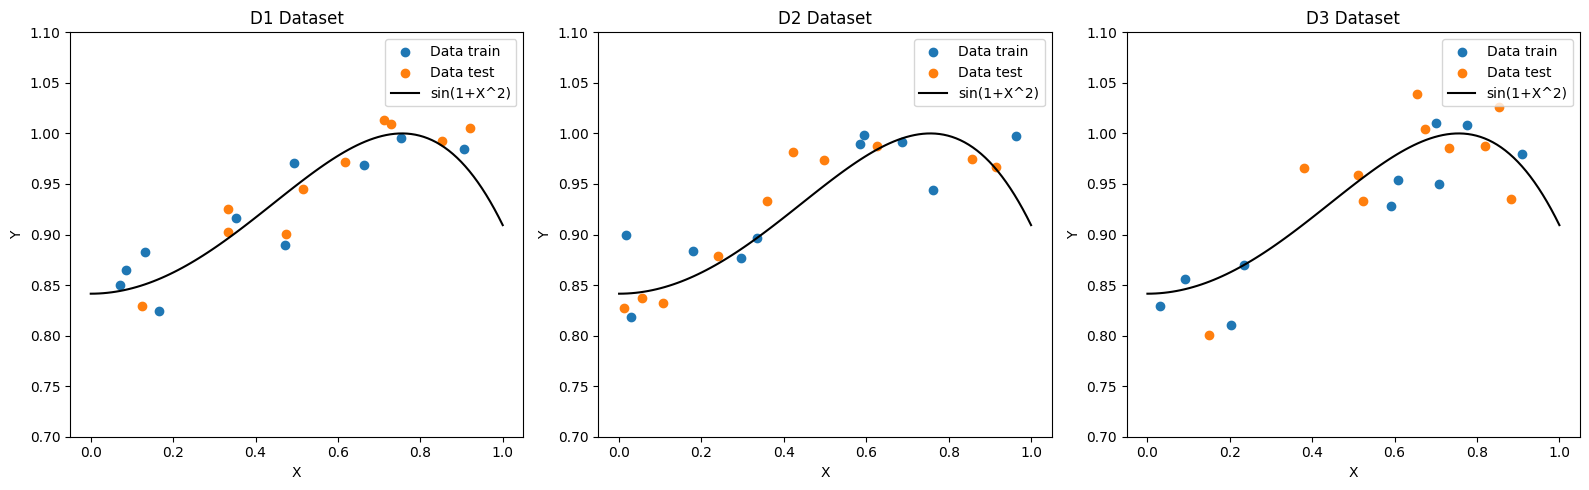

In [ ]:
show_data(train_datasets, test_datasets)

Huấn luyện model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_regression(X, Y, degree):
  p_features = PolynomialFeatures(degree = degree) #đa thức với bậc tương ứng
  X_poly = p_features.fit_transform(X.reshape(-1, 1)) #chuyển dữ liệu về 1D array
  #huấn luyện model
  model = LinearRegression()
  model.fit(X_poly, Y)

  return model
degrees = range(1, 10)

Plot các đồ thị để minh họa tập dữ liệu được huấn luyện

In [ ]:

def plot_graph(train_datasets):
  fig, axs = plt.subplots(3, 3, figsize=(15, 15))

  for i, degree in enumerate(degrees):
      row = i // 3
      col = i % 3
      model_D1 = polynomial_regression(train_datasets[0][0], train_datasets[0][1], degree) #huấn luyện D1
      model_D2 = polynomial_regression(train_datasets[1][0], train_datasets[1][1], degree) #huấn luyện D2
      model_D3 = polynomial_regression(train_datasets[2][0], train_datasets[2][1], degree) #huấn luyện D3
      X_range = np.linspace(0, 1, 100)
      X_poly_range = PolynomialFeatures(degree = degree).fit_transform(X_range.reshape(-1, 1))
      yD1_pred = model_D1.predict(X_poly_range)
      yD2_pred = model_D2.predict(X_poly_range)
      yD3_pred = model_D3.predict(X_poly_range)
      #plot các tập dữ liệu sau khi được huấn luyện
      axs[row, col].plot(X_range, yD1_pred, label = f'D1')
      axs[row, col].plot(X_range, yD2_pred, label = f'D2')
      axs[row, col].plot(X_range, yD3_pred, label = f'D3')
      axs[row, col].plot(X_curve, Y_curve, color = 'black', label = 'sin(1+X^2)', alpha = 0.6)
      axs[row, col].set_title(f'Degree {degree}')
      axs[row, col].set_xlabel('X')
      axs[row, col].set_ylabel('Y')
      axs[row, col].set_ylim(0.7, 1.1)
      axs[row, col].legend()

  plt.tight_layout()
  plt.show()

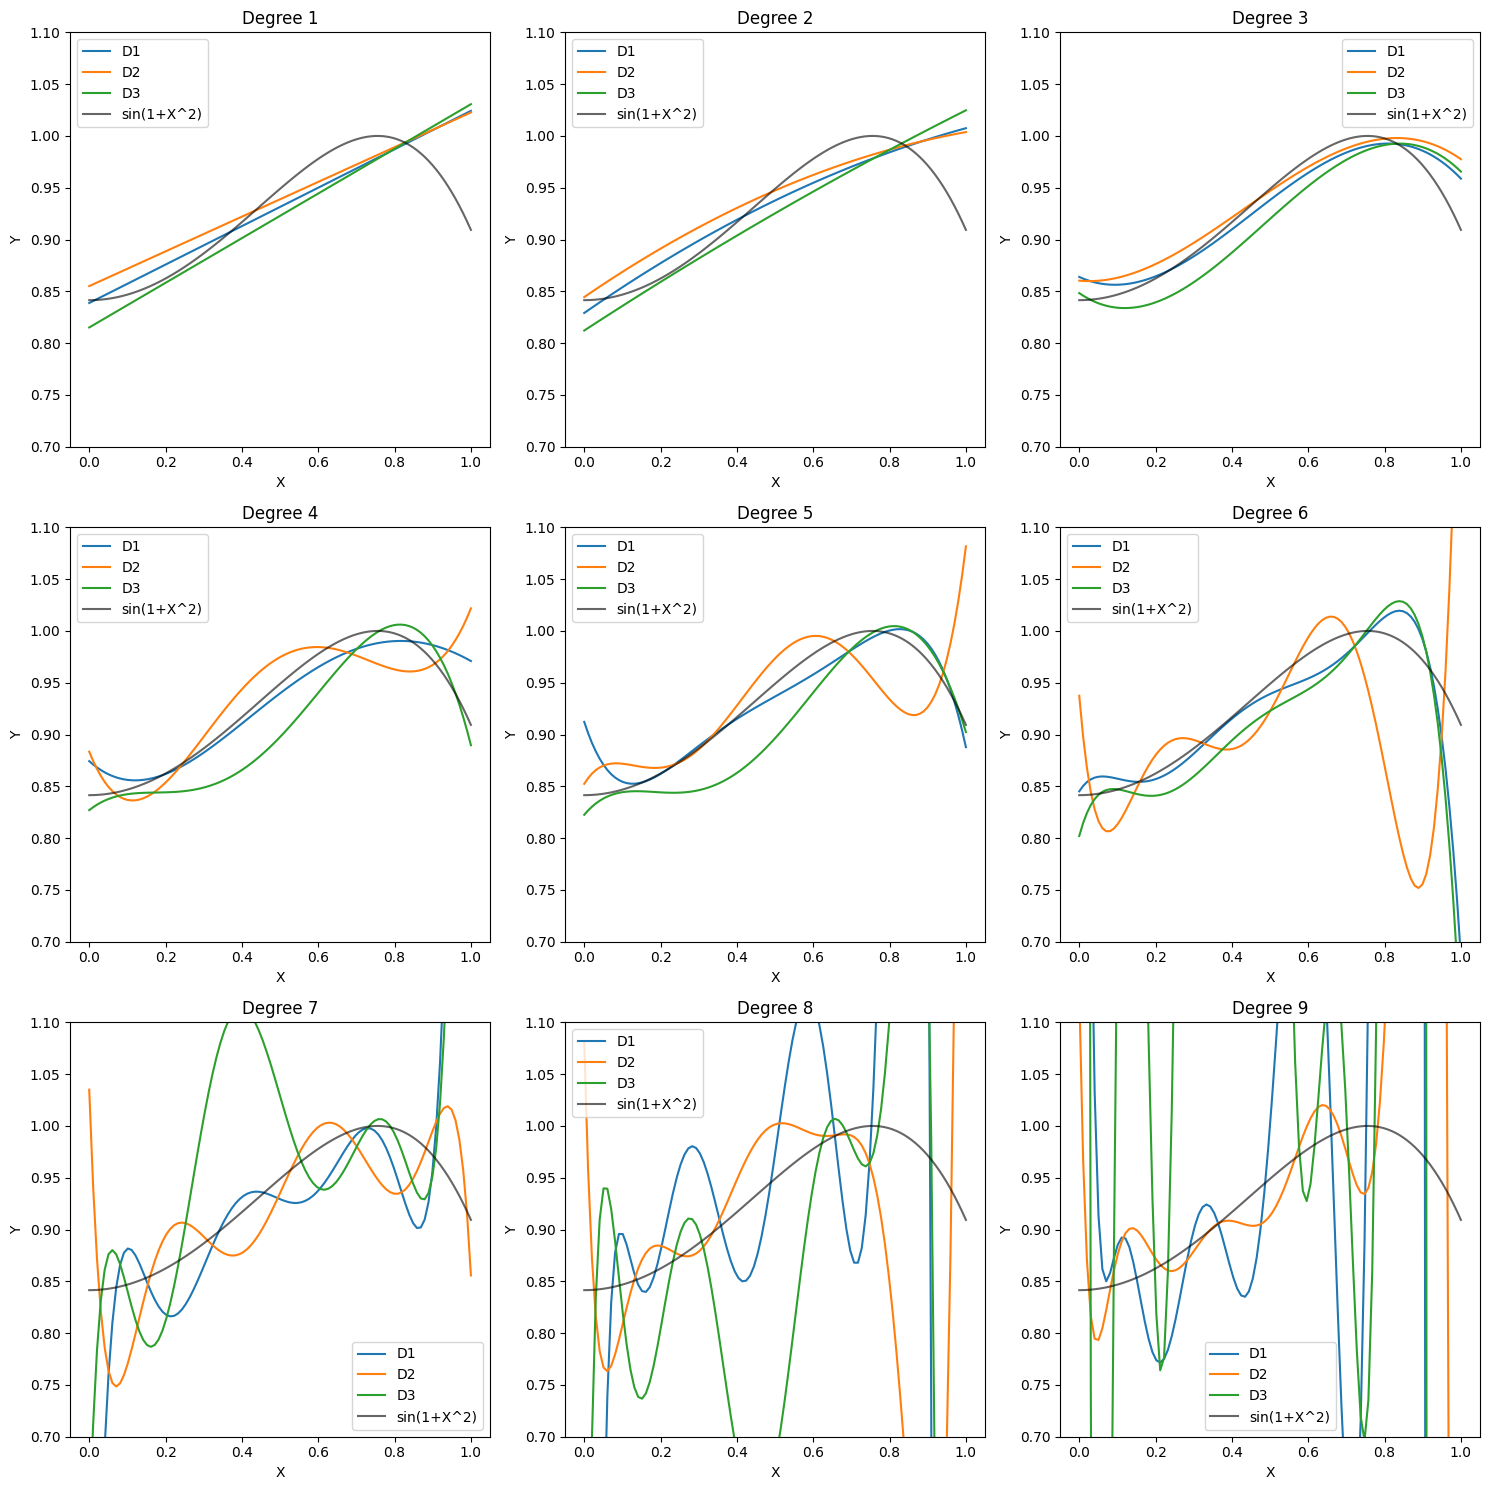

In [ ]:
plot_graph(train_datasets)

Tính E_in và E_out tương ứng với 9 mô hình

In [ ]:
from sklearn.metrics import mean_squared_error
def calculate_Error(D1_train, D1_test):
  E_in_values = []
  E_out_values = []

  for degree in degrees:
      # Dự đoán trên tập train và tính toán E_in
      model = polynomial_regression(D1_train[0], D1_train[1], degree)
      Y_pred_train = model.predict(PolynomialFeatures(degree=degree).fit_transform(D1_train[0].reshape(-1, 1)))
      E_in = mean_squared_error(D1_train[1], Y_pred_train)
      E_in_values.append(E_in)

      # Dự đoán trên tập test và tính toán E_out
      Y_pred_test = model.predict(PolynomialFeatures(degree=degree).fit_transform(D1_test[0].reshape(-1, 1)))
      E_out = mean_squared_error(D1_test[1], Y_pred_test)
      E_out_values.append(E_out)

  results_table = pd.DataFrame({
      'Degree': degrees,
      'E_in': E_in_values,
      'E_out': E_out_values
  })
  print(results_table.to_string(index = False))

In [ ]:
calculate_Error(train_datasets[0], test_datasets[0])

 Degree         E_in    E_out
      1 6.465567e-04 0.000587
      2 6.211594e-04 0.000553
      3 5.328224e-04 0.000467
      4 5.305663e-04 0.000481
      5 5.181873e-04 0.000450
      6 5.095069e-04 0.000705
      7 4.171540e-04 0.001786
      8 2.209259e-04 0.425392
      9 4.806293e-21 8.994712


EXPERIMENT 2: N = 100


In [ ]:
N = 100
D1_train, D1_test = generate_data(N)
D2_train, D2_test = generate_data(N)
D3_train, D3_test = generate_data(N)
train_datasets = [D1_train, D2_train, D3_train]
test_datasets = [D1_test, D2_test, D3_test]

Hiển thị các tập dữ liệu

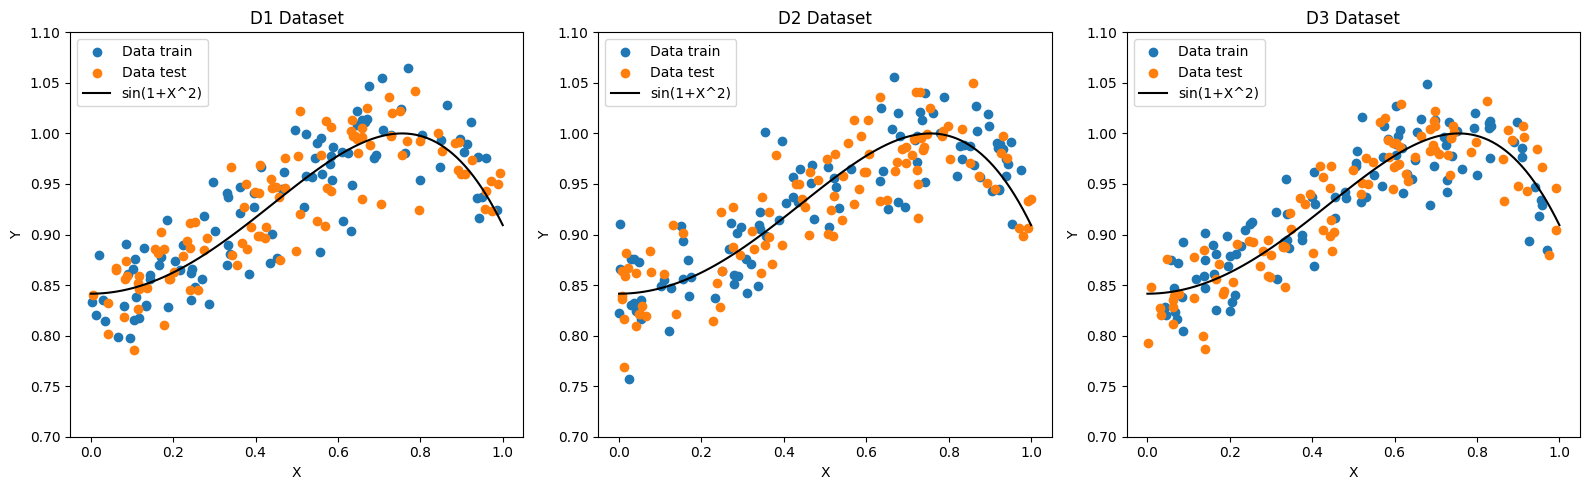

In [ ]:
show_data(train_datasets, test_datasets)

Plot các đồ thị để minh họa tập dữ liệu được huấn luyện

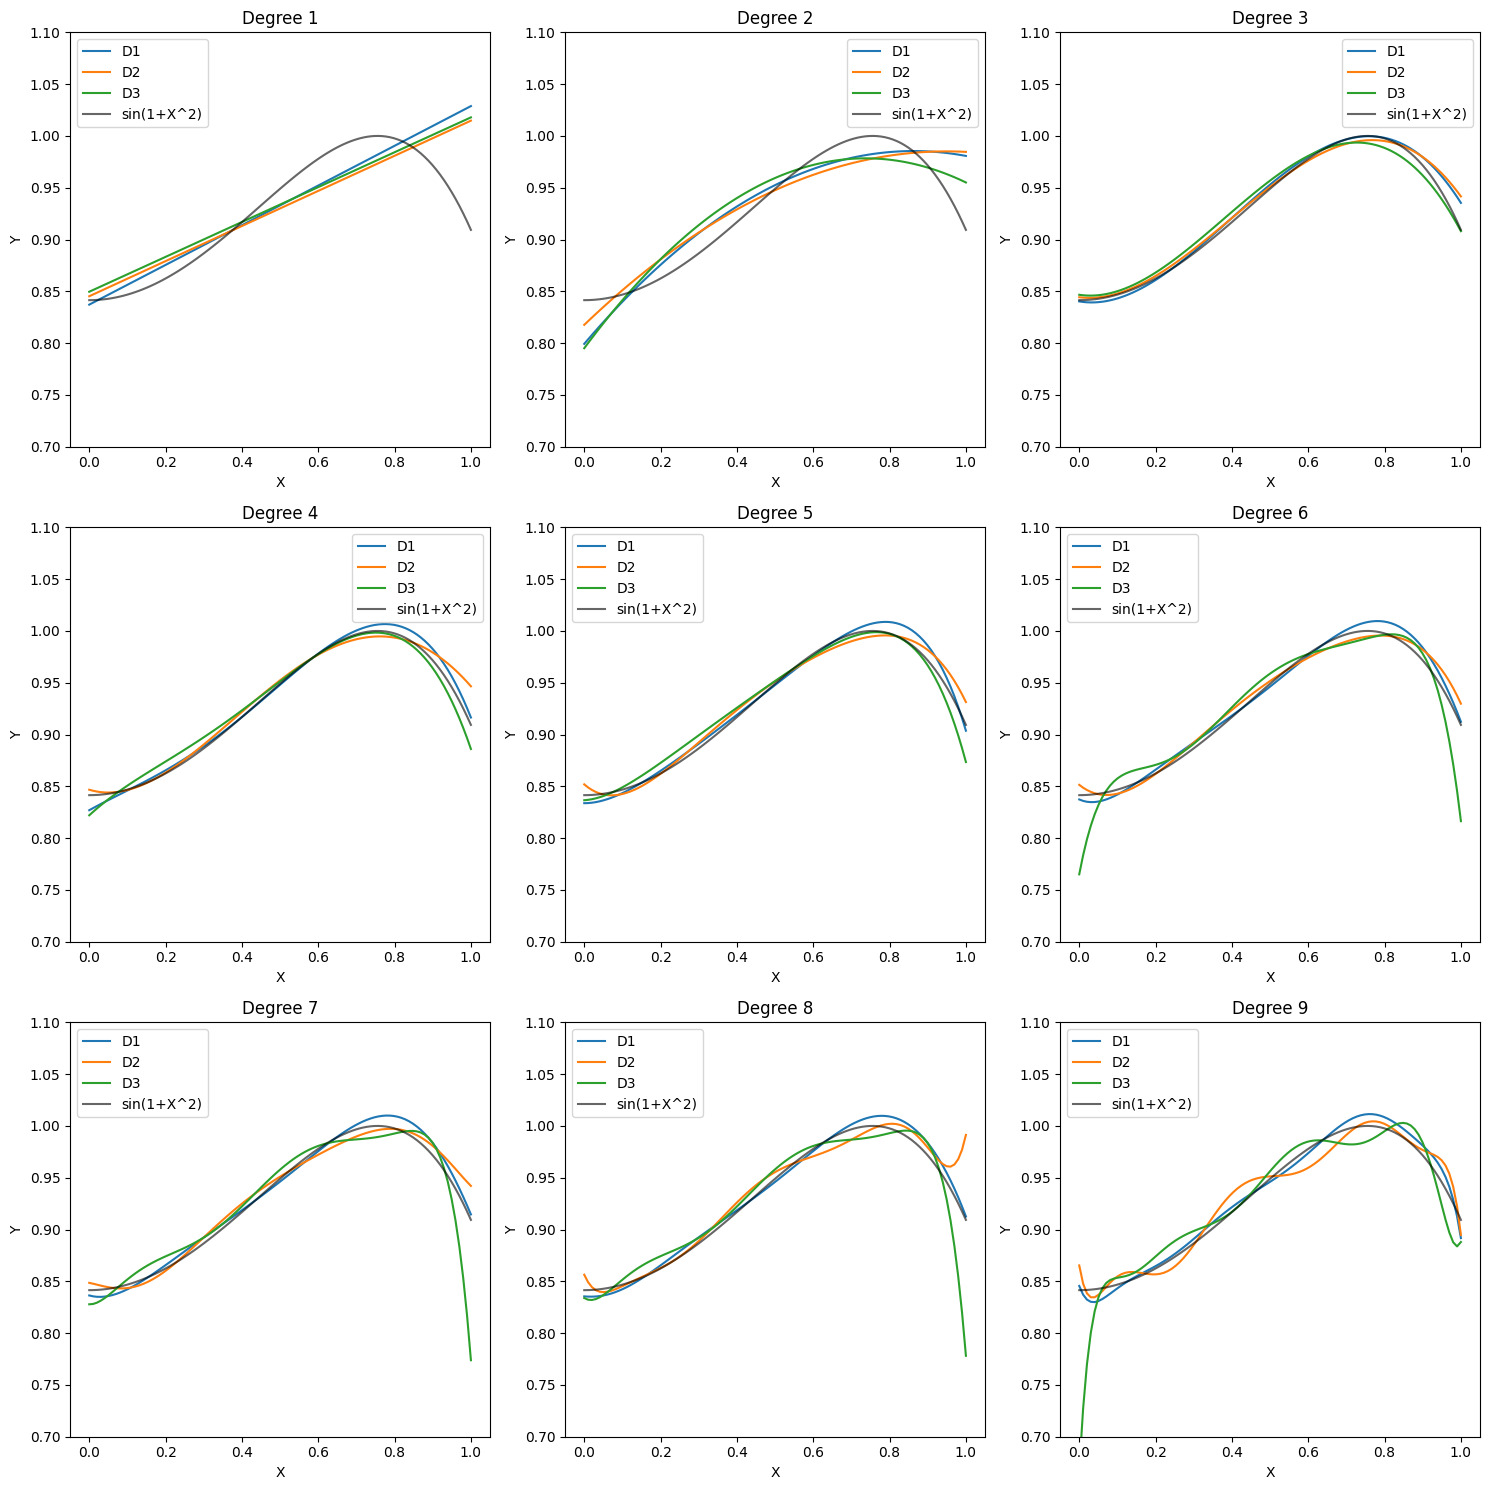

In [ ]:
plot_graph(train_datasets)

Tính E_in và E_out tương ứng với 9 mô hình

In [ ]:
calculate_Error(train_datasets[0], test_datasets[0])

 Degree     E_in    E_out
      1 0.001613 0.001508
      2 0.001283 0.001068
      3 0.001057 0.000887
      4 0.001037 0.000892
      5 0.001032 0.000912
      6 0.001031 0.000901
      7 0.001031 0.000899
      8 0.001030 0.000900
      9 0.001025 0.000919


EXPERIMENT 3: N = 1000

In [ ]:
N = 1000
D1_train, D1_test = generate_data(N)
D2_train, D2_test = generate_data(N)
D3_train, D3_test = generate_data(N)
train_datasets = [D1_train, D2_train, D3_train]
test_datasets = [D1_test, D2_test, D3_test]

Hiển thị các tập dữ liệu

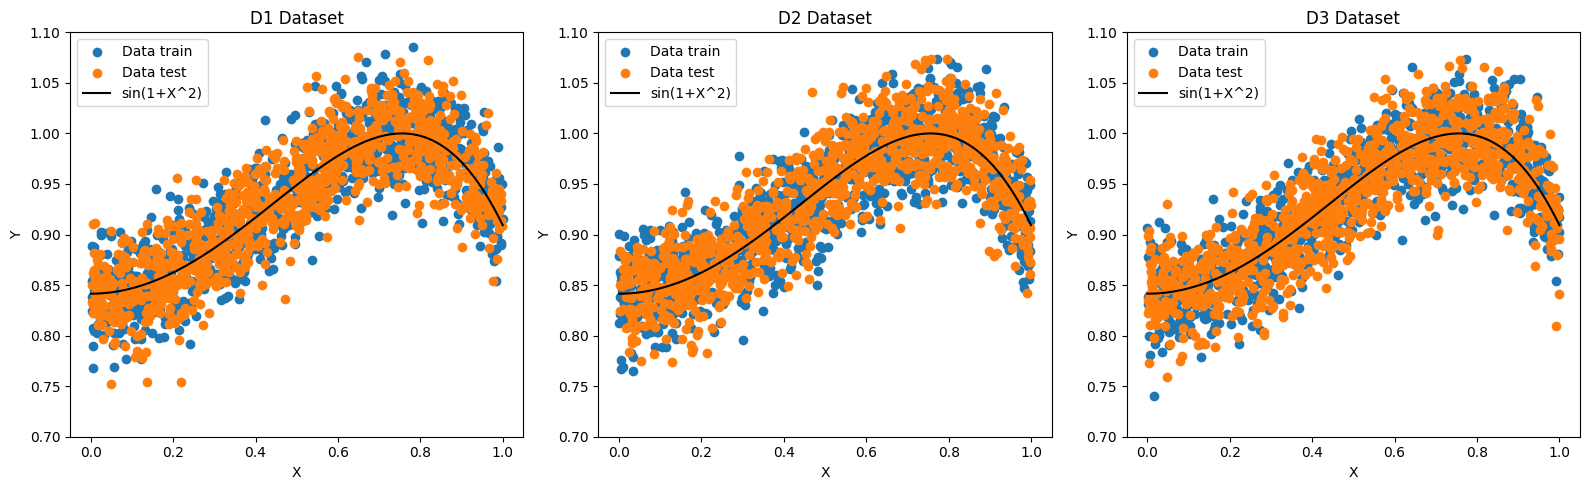

In [ ]:
show_data(train_datasets, test_datasets)

Plot các đồ thị để minh họa tập dữ liệu được huấn luyện

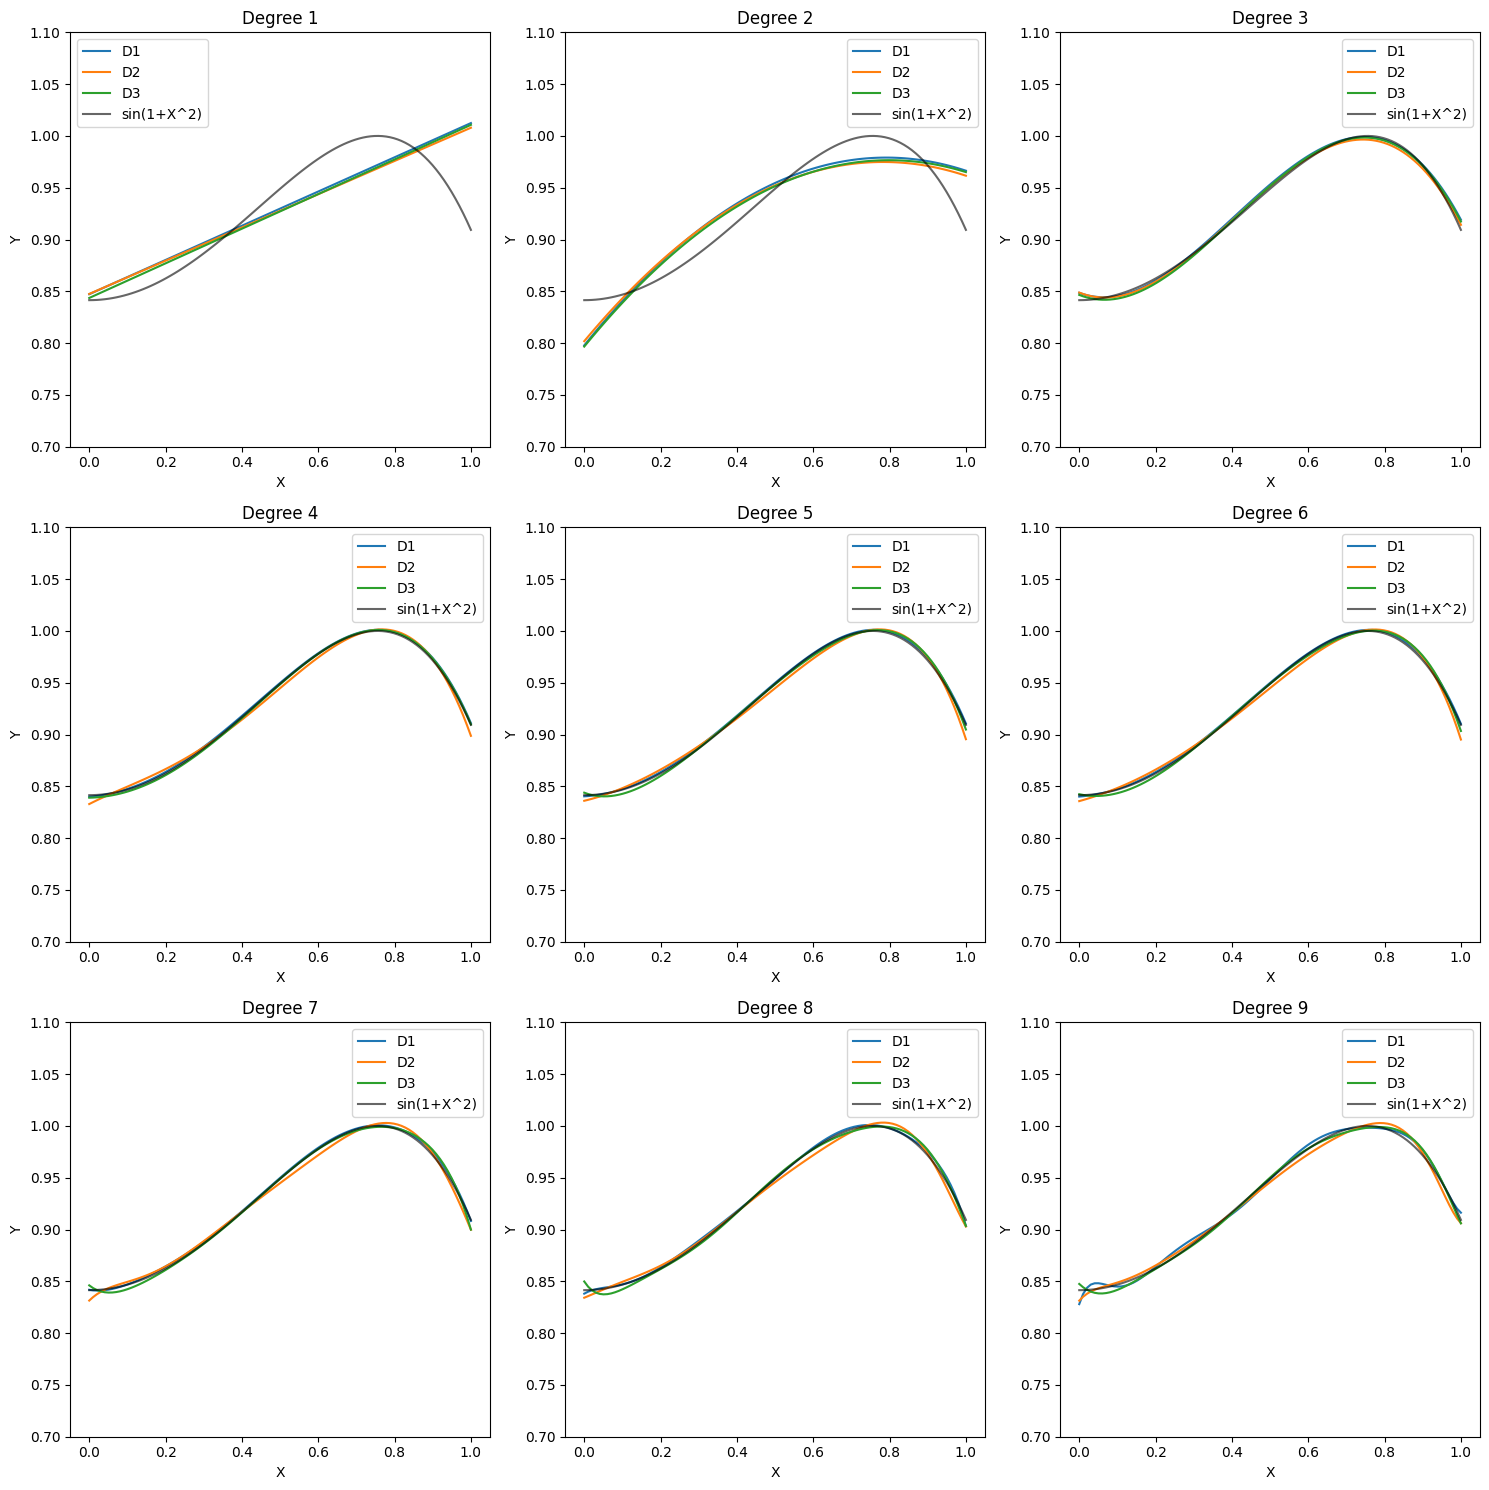

In [ ]:
plot_graph(train_datasets)

Tính E_in và E_out tương ứng với 9 mô hình

In [ ]:
calculate_Error(train_datasets[0], test_datasets[0])

 Degree     E_in    E_out
      1 0.001707 0.001636
      2 0.001252 0.001208
      3 0.000911 0.000855
      4 0.000903 0.000857
      5 0.000903 0.000857
      6 0.000903 0.000857
      7 0.000903 0.000858
      8 0.000902 0.000859
      9 0.000896 0.000868


Nhận xét:
1. Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến bias?

    *Trả lời:* Tăng độ phức tạp của mô hình làm giảm bias

2. Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến variance?

    *Trả lời:* Tăng độ phức tạp của mô hình làm tăng variance

3. Tăng kích thước tập train ảnh hưởng thế nào đến bias?

    *Trả lời:* Tăng kích thước tập train làm giảm bias

4. Tăng kích thước tập train ảnh hưởng thế nào đến variance?

    *Trả lời:* Tăng kích thước tập train làm giảm variance

>*Kết luận:* Việc tăng độ phức tạp của mô hình làm cho variance tăng và bias giảm, điều này có thể dẫn tới overfitting (variance cao, bias thấp), nhất là với tập dữ liệu có quá ít điểm dữ liệu. Ta có thể hạn chế underfitting (tập dữ liệu có kích thước nhỏ, không mô tả được mẫu cơ bản của dữ liệu), hay overfitting (mô hình bị quá phức tạp, phụ thuộc nhiều vào tập train) bằng cách tăng kích thước tập train lên. Vì điều này khiến dữ liệu được khái quát tốt hơn, mô hình hiểu được nhiều mẫu dữ liệu từ thực tế hơn, làm cho variance và bias có xu hướng giảm xuống thấp, từ đó, ta có thể hạn chế những vấn đề nói trên.


